#Analisis del problema
Se necesita clasificar los tumores cerebrales que puede tener una persona por medio de lo que se puede ver en una imagen del mismo tumor, estos se dividen en glioma, meningioma, no tumor y por ultimo pituitary.

## Authors
  

*   Gustavo Méndez


### Importar librerias

In [ ]:
# !pip install tensorflow-gpu==2.0.0.alpha0

In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random


In [ ]:
tf.__version__

'2.8.0'

## PASO #2: Importar modelo con pesos preentrenados

In [ ]:
model = tf.keras.applications.ResNet50(weights = 'imagenet')

102981632/102967424 [==============================] - 1s 0us/step


## Paso #3: Evalúe el modelo pre-entrenado


- Check this out: http://www.image-net.org/synset?wnid=n02835271
- Search for Bicycle
- https://lear.inrialpes.fr/people/gordo/ImageNetResults/sift1000_accuracy_withPrior/results_sift_0253.htm

In [ ]:
!wget https://atlasanimal.com/wp-content/uploads/2021/02/elefante.jpg

--2022-05-10 05:33:42--  https://atlasanimal.com/wp-content/uploads/2021/02/elefante.jpg
Resolving atlasanimal.com (atlasanimal.com)... 172.67.153.184, 104.21.12.231, 2606:4700:3030::ac43:99b8, ...
Connecting to atlasanimal.com (atlasanimal.com)|172.67.153.184|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘elefante.jpg’

elefante.jpg            [ <=>                ] 145.09K  --.-KB/s    in 0.02s   

2022-05-10 05:33:43 (5.85 MB/s) - ‘elefante.jpg’ saved [148573]



In [ ]:
!wget https://images-na.ssl-images-amazon.com/images/I/61SpjnjBTQL._AC_UL604_SR604,400_.jpg

--2022-05-10 05:34:49--  https://images-na.ssl-images-amazon.com/images/I/61SpjnjBTQL._AC_UL604_SR604,400_.jpg
Resolving images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)... 151.101.1.16, 151.101.65.16, 151.101.129.16, ...
Connecting to images-na.ssl-images-amazon.com (images-na.ssl-images-amazon.com)|151.101.1.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32693 (32K) [image/jpeg]
Saving to: ‘61SpjnjBTQL._AC_UL604_SR604,400_.jpg’

61SpjnjBTQL._AC_UL6 100%[===================>]  31.93K  --.-KB/s    in 0.002s  

2022-05-10 05:34:49 (15.8 MB/s) - ‘61SpjnjBTQL._AC_UL604_SR604,400_.jpg’ saved [32693/32693]



In [ ]:
Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/elefante.jpg', target_size = (224, 224))

In [ ]:
Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/61SpjnjBTQL._AC_UL604_SR604,400_.jpg', target_size = (224, 224))

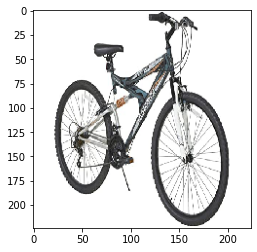

In [ ]:
plt.imshow(Sample_Image)

In [ ]:
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)

In [ ]:
np.shape(Sample_Image)

(224, 224, 3)

In [ ]:
Sample_Image = np.expand_dims(Sample_Image, axis = 0)
np.shape(Sample_Image)

(1, 224, 224, 3)

In [ ]:
Sample_Image.max()

255.0

In [ ]:
Sample_Image.min()

0.0

In [ ]:
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)

In [ ]:
Sample_Image.max()

151.061

In [ ]:
Sample_Image.min()

-123.68

In [ ]:
predictions = model.predict(Sample_Image)

In [ ]:
print('predictions:', tf.keras.applications.resnet50.decode_predictions(predictions, top = 5)[0])

49152/35363 [=========================================] - 0s 0us/step
predictions: [('n03792782', 'mountain_bike', 0.87285304), ('n03208938', 'disk_brake', 0.110198826), ('n02835271', 'bicycle-built-for-two', 0.004763344), ('n02110063', 'malamute', 0.0016451081), ('n03887697', 'paper_towel', 0.0012763139)]


## Paso #4: Aplicar aprendizaje de transferencia y reentrenar el modelo

In [ ]:
base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = False)

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
print(base_model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                        

In [ ]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name)

# Top = False
# Total params: 23,587,712
# Layers = 174


# Top = True
# Total params: 25,636,712
# Layers = 176


0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
# base_model = tf.keras.applications.ResNet50(weights = 'imagenet', include_top = True)

In [ ]:
# print(base_model.summary())

In [ ]:
# or i, layer in enumerate(base_model.layers):
#    print(i, layer.name)

In [ ]:
x = base_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [ ]:
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
preds = tf.keras.layers.Dense(4, activation = 'softmax')(x)

In [ ]:
model = tf.keras.models.Model(inputs = base_model.input, outputs = preds)

In [ ]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_2[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                         

In [ ]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_2
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [ ]:
for layer in model.layers[:175]:
    layer.trainable = False

In [ ]:
for layer in model.layers[175:]:
    layer.trainable = True

In [ ]:
!wget https://www.dropbox.com/s/g0yjhk8738tzu3s/TrainingCancer.zip

--2022-05-10 05:36:46--  https://www.dropbox.com/s/g0yjhk8738tzu3s/TrainingCancer.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/g0yjhk8738tzu3s/TrainingCancer.zip [following]
--2022-05-10 05:36:46--  https://www.dropbox.com/s/raw/g0yjhk8738tzu3s/TrainingCancer.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfd739a1556c88675f3c52e62b5.dl.dropboxusercontent.com/cd/0/inline/Bk_81V6NnnF_06udyKlx1eYGvPk5eKVEb1tiM4yAMQ7t-02K40IE4hhL6EYS9Xae0pbUe3CIPAvp_9dFXbqvuAnYlOWmcgkbzDDoGbUqEKNaxOOWvEBvkMNhNyotKILAJVFZaJ5WhZ_vHpq4RbFOmw8U6W1HykO0rvBgWOdUsRMzVA/file# [following]
--2022-05-10 05:36:46--  https://ucfd739a1556c88675f3c52e62b5.dl.dropboxusercontent.com/cd/0/inline/Bk_81V6NnnF_06udyKlx1eYGvPk5eKVEb1tiM4yAMQ7t-02K40

In [ ]:
!unzip TrainingCancer.zip

Streaming output truncated to the last 5000 lines.
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/glioma/Tr-gl_0732.jpg  
  inflating: Training/glioma/Tr-gl_0733.jpg  
  inflating: Training/glioma/Tr-gl_0734.jpg  
  inflating: Training/glioma/Tr-gl_0735.jpg  
  inflating: Training/glioma/Tr-gl_0736.jpg  
  inflating: Training/glioma/Tr-gl_0737.jpg  
  inflating: Training/glioma/Tr-gl_0738.jpg  
  inflating: Training/glioma/Tr-gl_0739.jpg  
  inflating: Training/glioma/Tr-gl_0740.jpg  
  inflating: Training/glioma/Tr-gl_0741.jpg  
  inflating: Training/glioma/Tr-gl_0742.jpg  
  inflating: Training/glioma/Tr-gl_0743.jpg  
  inflating: Training/glioma/Tr-gl_0744.jpg  
  inflating: Training/glioma/

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function= tf.keras.applications.resnet50.preprocess_input)

train_generator = train_datagen.flow_from_directory('/content/Training',
                                                   target_size = (224, 224),
                                                   color_mode = 'rgb',
                                                   batch_size = 32,
                                                   class_mode = 'categorical',
                                                   shuffle = True)

Found 5712 images belonging to 4 classes.


In [ ]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
batch_size=50

In [ ]:
history = model.fit(train_generator,steps_per_epoch=train_generator.samples / batch_size, epochs = 4)

Epoch 1/4
114/114 [==============================] - 49s 139ms/step - loss: 0.6423 - accuracy: 0.7380
Epoch 2/4
114/114 [==============================] - 16s 136ms/step - loss: 0.3732 - accuracy: 0.8750
Epoch 3/4
114/114 [==============================] - 16s 135ms/step - loss: 0.3091 - accuracy: 0.8968
Epoch 4/4
114/114 [==============================] - 16s 137ms/step - loss: 0.2641 - accuracy: 0.9146


# Paso #5: Evaluar el modelo

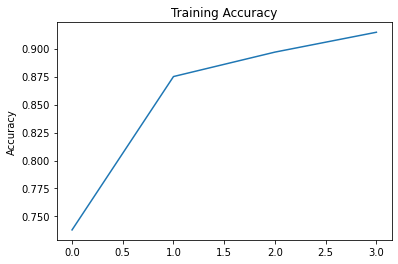

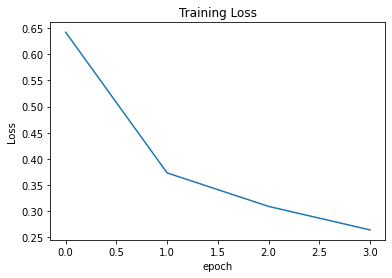

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']

plt.figure()
plt.plot(acc, label='Training Accuracy')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.figure()

plt.plot(loss, label='Training Loss')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
!wget https://gitlab.com/ejimenez/cancer_img_4_types/-/archive/main/cancer_img_4_types-main.tar

--2022-05-10 05:42:41--  https://gitlab.com/ejimenez/cancer_img_4_types/-/archive/main/cancer_img_4_types-main.tar
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘cancer_img_4_types-main.tar’

cancer_img_4_types-     [   <=>              ] 148.40M   261MB/s    in 0.6s    

2022-05-10 05:42:42 (261 MB/s) - ‘cancer_img_4_types-main.tar’ saved [155607040]



In [ ]:
!unzip cancer_img_4_types-main.tar

Streaming output truncated to the last 5000 lines.
  inflating: Training/meningioma/Tr-me_0707.jpg  
  inflating: Training/meningioma/Tr-me_0708.jpg  
  inflating: Training/meningioma/Tr-me_0709.jpg  
  inflating: Training/meningioma/Tr-me_0710.jpg  
  inflating: Training/meningioma/Tr-me_0711.jpg  
  inflating: Training/meningioma/Tr-me_0712.jpg  
  inflating: Training/meningioma/Tr-me_0713.jpg  
  inflating: Training/meningioma/Tr-me_0714.jpg  
  inflating: Training/meningioma/Tr-me_0715.jpg  
  inflating: Training/meningioma/Tr-me_0716.jpg  
  inflating: Training/meningioma/Tr-me_0717.jpg  
  inflating: Training/meningioma/Tr-me_0718.jpg  
  inflating: Training/meningioma/Tr-me_0719.jpg  
  inflating: Training/meningioma/Tr-me_0720.jpg  
  inflating: Training/meningioma/Tr-me_0721.jpg  
  inflating: Training/meningioma/Tr-me_0722.jpg  
  inflating: Training/meningioma/Tr-me_0723.jpg  
  inflating: Training/meningioma/Tr-me_0724.jpg  
  inflating: Training/meningioma/Tr-me_0725.jpg  

In [ ]:
Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/Testing/glioma/Te-glTr_0000.jpg', target_size = (224, 224))

In [ ]:
Sample_Image= tf.keras.preprocessing.image.load_img(r'/content/Testing/notumor/Te-noTr_0000.jpg', target_size = (224, 224))

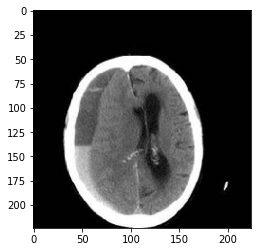

In [ ]:
plt.imshow(Sample_Image)

In [ ]:
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)
np.shape(Sample_Image)

(224, 224, 3)

In [ ]:
Sample_Image = np.expand_dims(Sample_Image, axis = 0)


In [ ]:
Sample_Image = tf.keras.applications.resnet50.preprocess_input(Sample_Image)
predictions = model.predict(Sample_Image)
print('Predictions:', predictions)

Predictions: [[0.00454541 0.12312818 0.86640036 0.0059261 ]]


# Paso #6: #Conclusiones

La transferencia de aprendizaje es una tecnica bastante usado en el mercado, cuando no se tiene a mano poder computacional para hacer modelos robustos es una alternativa altamente selecionable.